In [6]:
from datetime import date, timedelta
import pandas as pd
from cmdty_storage import CmdtyStorage, intrinsic_value, RatchetInterp


In [7]:
def create_piecewise_flat_series(data, dt_index, freq):
    period_index = pd.PeriodIndex([pd.Period(dt, freq=freq) for dt in dt_index])
    return pd.Series(data, period_index).resample(freq).fillna('pad')

In [8]:
constraints =   [
                    (date(2019, 8, 28), 
                                [
                                    (0.0, -150.0, 255.2),
                                    (2000.0, -150.0, 255.2),
                                ]),
                    (date(2019, 9, 10), 
                             [
                                 (0.0, -170.5, 235.8),
                                 (700.0, -180.2, 200.77),
                                 (1800.0, -180.2, 200.77),
                            ])
                ]

storage_start = date(2019, 8, 28)
storage_end = date(2019, 9, 25)
constant_injection_cost = 0.015
constant_pcnt_consumed_inject = 0.0001
constant_withdrawal_cost = 0.02
constant_pcnt_consumed_withdraw = 0.000088
constant_pcnt_inventory_loss = 0.001;
constant_pcnt_inventory_cost = 0.002;

cmdty_storage = CmdtyStorage('D', storage_start, storage_end, constant_injection_cost, constant_withdrawal_cost, 
                         constraints, ratchet_interp=RatchetInterp.LINEAR,
                        cmdty_consumed_inject=constant_pcnt_consumed_inject, cmdty_consumed_withdraw=constant_pcnt_consumed_withdraw,
                        inventory_loss=constant_pcnt_inventory_loss, inventory_cost=constant_pcnt_inventory_cost)

inventory = 650.0
val_date = date(2019, 9, 2)

forward_curve = create_piecewise_flat_series([58.89, 61.41, 59.89, 59.89], 
                          [val_date, date(2019, 9, 12), date(2019, 9, 18), storage_end], freq='D')

flat_interest_rate = 0.03
interest_rate_curve = pd.Series(index = pd.period_range(val_date, storage_end + timedelta(days=50), freq='D'), dtype='float64')
interest_rate_curve[:] = flat_interest_rate

twentieth_of_next_month = lambda period: period.asfreq('M').asfreq('D', 'end') + 20
intrinsic_results = intrinsic_value(cmdty_storage, val_date, inventory, forward_curve, 
                settlement_rule=twentieth_of_next_month, interest_rates=interest_rate_curve, 
                                    num_inventory_grid_points=100)
print("Storage Intrinsic NPV")
print("{:,.2f}".format(intrinsic_results.npv) )

Storage Intrinsic NPV
40,394.36


C:\Users\Jake\AppData\Local\Temp\ipykernel_8556\2777173618.py:3: FutureWarning: PeriodIndexResampler.fillna is deprecated and will be removed in a future version. Use obj.ffill(), obj.bfill(), or obj.nearest() instead.
  return pd.Series(data, period_index).resample(freq).fillna('pad')


<Axes: >

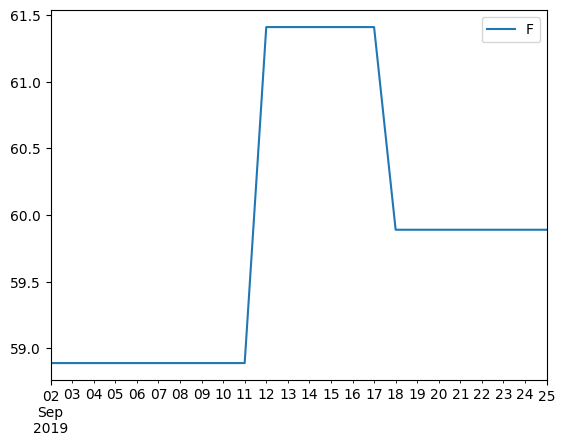

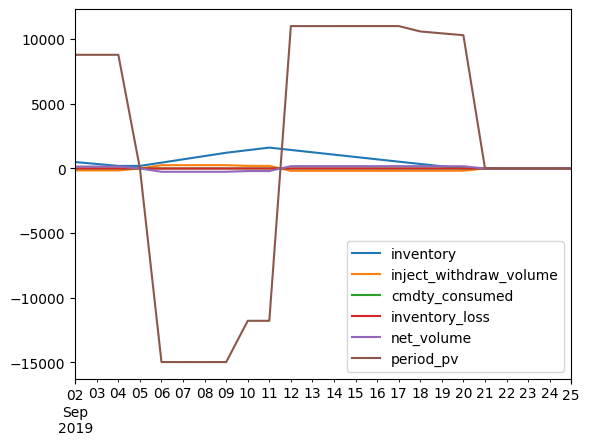

In [10]:
#%matplotlib qt
ax = forward_curve.plot(legend=True)
ax.legend("Forward Curve")
intrinsic_results.profile.plot()

In [11]:
intrinsic_results.profile


,inventory,inject_withdraw_volume,cmdty_consumed,inventory_loss,net_volume,period_pv
2019-09-02,499.350000,-150.000000,0.013200,0.650000,149.986800,8793.644395
2019-09-03,348.850650,-150.000000,0.013200,0.499350,149.986800,8793.946024
2019-09-04,198.501799,-150.000000,0.013200,0.348851,149.986800,8794.247301
2019-09-05,198.303298,0.000000,0.000000,0.198502,-0.000000,-0.396906
2019-09-06,453.304994,255.200000,0.025520,0.198303,-255.225520,-14975.273558
2019-09-07,708.051689,255.200000,0.025520,0.453305,-255.225520,-14975.783005
2019-09-08,962.543638,255.200000,0.025520,0.708052,-255.225520,-14976.291858
2019-09-09,1216.781094,255.200000,0.025520,0.962544,-255.225520,-14976.800118
2019-09-10,1416.334313,200.770000,0.020077,1.216781,-200.790077,-11783.410878
2019-09-11,1615.687979,200.770000,0.020077,1.416334,-200.790077,-11783.809242


#### Trinomial Tree Valuation Example

In [12]:
from cmdty_storage import trinomial_value, trinomial_deltas

# Trinomial Tree parameters
mean_reversion = 14.5
spot_volatility = create_piecewise_flat_series([1.35, 1.13, 1.24, 1.24],
                           [val_date, date(2019, 9, 12), date(2019, 9, 18), storage_end], freq='D')
time_step = 1.0/365.0

trinomial_value = trinomial_value(cmdty_storage, val_date, inventory, forward_curve,
                spot_volatility, mean_reversion, time_step,
                 settlement_rule=twentieth_of_next_month,
                interest_rates=interest_rate_curve, num_inventory_grid_points=100)

print("Storage Trinomial Tree Model NPV")
print("{:,.2f}".format(trinomial_value) )

# Delta
# Can specify the forward points to calculate delta for in several different ways as demonstrated below
delta_fwd_contracts = [
    date(2019, 8, 29),
    '2019-08-29',
    pd.Period(year=2019, month=9, freq='M'),
    (date(2019, 8, 29), date(2019, 8, 30)),
    ('2019-09-01', '2019-09-10'),
    (pd.Period(year=2019, month=9, day=11, freq='D'), pd.Period(year=2019, month=9, day=25, freq='D'))
]
trinomial_deltas = trinomial_deltas(cmdty_storage, val_date, inventory, forward_curve,
                spot_volatility, mean_reversion, time_step,
                fwd_contracts=delta_fwd_contracts,
                 settlement_rule=twentieth_of_next_month,
                interest_rates=interest_rate_curve, num_inventory_grid_points=100)
print("")
print("Storage Trinomial Tree Model Deltas")
print(trinomial_deltas)

C:\Users\Jake\AppData\Local\Temp\ipykernel_8556\2777173618.py:3: FutureWarning: PeriodIndexResampler.fillna is deprecated and will be removed in a future version. Use obj.ffill(), obj.bfill(), or obj.nearest() instead.
  return pd.Series(data, period_index).resample(freq).fillna('pad')


Storage Trinomial Tree Model NPV
42,875.67

Storage Trinomial Tree Model Deltas
[0.0, 0.0, 688.4045869810507, 0.0, -434.90086209203577, 1123.3054479816929]


### Multi-Factor Least Squares Monte Carlo Example
Creating the storage objects.

In [13]:
from cmdty_storage import CmdtyStorage
import pandas as pd
storage_simple = CmdtyStorage(
    freq='D',
    storage_start = '2021-04-01',
    storage_end = '2022-04-01',
    injection_cost = 0.1,
    withdrawal_cost = 0.25,
    min_inventory = 0.0,
    max_inventory = 1500.0,
    max_injection_rate = 25.5,
    max_withdrawal_rate = 30.9
)

storage_with_ratchets = CmdtyStorage(
    freq='D',
    storage_start = '2021-04-01',
    storage_end = '2022-04-01',
    injection_cost = 0.1,
    withdrawal_cost = 0.25,
    ratchets = [
                ('2021-04-01', # For days after 2021-04-01 (inclusive) until 2022-10-01 (exclusive):
                       [
                            (0.0, -150.0, 250.0),    # At min inventory of zero, max withdrawal of 150, max injection 250
                            (2000.0, -200.0, 175.0), # At inventory of 2000, max withdrawal of 200, max injection 175
                            (5000.0, -260.0, 155.0), # At inventory of 5000, max withdrawal of 260, max injection 155
                            (7000.0, -275.0, 132.0), # At max inventory of 7000, max withdrawal of 275, max injection 132
                        ]),
                  ('2022-10-01', # For days after 2022-10-01 (inclusive):
                       [
                            (0.0, -130.0, 260.0),    # At min inventory of zero, max withdrawal of 130, max injection 260
                            (2000.0, -190.0, 190.0), # At inventory of 2000, max withdrawal of 190, max injection 190
                            (5000.0, -230.0, 165.0), # At inventory of 5000, max withdrawal of 230, max injection 165
                            (7000.0, -245.0, 148.0), # At max inventory of 7000, max withdrawal of 245, max injection 148
                        ]),
                 ],
    ratchet_interp = RatchetInterp.LINEAR
)

In [15]:
from cmdty_storage import three_factor_seasonal_value

# Creating the Inputs
monthly_index = pd.period_range(start='2021-04-25', periods=25, freq='M')
monthly_fwd_prices = [16.61, 15.68, 15.42, 15.31, 15.27, 15.13, 15.96, 17.22, 17.32, 17.66, 
                      17.59, 16.81, 15.36, 14.49, 14.28, 14.25, 14.32, 14.33, 15.30, 16.58, 
                      16.64, 16.79, 16.64, 15.90, 14.63]
fwd_curve = pd.Series(data=monthly_fwd_prices, index=monthly_index).resample('D').fillna('pad')

rates = [0.005, 0.006, 0.0072, 0.0087, 0.0101, 0.0115, 0.0126]
rates_pillars = pd.PeriodIndex(freq='D', data=['2021-04-25', '2021-06-01', '2021-08-01', '2021-12-01', '2022-04-01', 
                                              '2022-12-01', '2023-12-01'])
ir_curve = pd.Series(data=rates, index=rates_pillars).resample('D').asfreq('D').interpolate(method='linear')

def settlement_rule(delivery_date):
    return delivery_date.asfreq('M').asfreq('D', 'end') + 20

storage_steps = CmdtyStorage(
    freq='D',
    storage_start = '2021-05-01',
    storage_end = '2023-04-01',
    injection_cost = 0.53,
    withdrawal_cost = 0.15,
    ratchets = [
                ('2021-04-01', # For days after 2021-04-01 (inclusive) until 2022-10-01 (exclusive):
                       [
                            (0.0, -5810.0, 7632.0),
                            (64000, -5810.1, 7632.0),
                            (64260, -15288.0, 7632.0),
                            (182070.0, -15288.0, 3816.0),
                            (192780.0, -15288.0, 2279.0),
                           (214200.0, -15288.0, 2279.0),
                        ]),
                 ],
    ratchet_interp = RatchetInterp.LINEAR
)


# Call the three-factor seasonal model
three_factor_results = three_factor_seasonal_value(
    cmdty_storage = storage_with_ratchets,
    val_date = '2021-04-25',
    inventory = 1500.0,
    fwd_curve = fwd_curve,
    interest_rates = ir_curve,
    settlement_rule = settlement_rule,
    num_sims = 2000,
    seed = 12,
    spot_mean_reversion = 91.0,
    spot_vol = 0.85,
    long_term_vol =  0.30,
    seasonal_vol = 0.19,
    basis_funcs = '1 + x_st + x_sw + x_lt + s + x_st**2 + x_sw**2 + x_lt**2 + s**2 + s * x_st',
    discount_deltas = True
)

# Inspect the NPV results
print('Full NPV:\t{0:,.0f}'.format(three_factor_results.npv))
print('Intrinsic NPV: \t{0:,.0f}'.format(three_factor_results.intrinsic_npv))
print('Extrinsic NPV: \t{0:,.0f}'.format(three_factor_results.extrinsic_npv))

C:\Users\Jake\AppData\Local\Temp\ipykernel_8556\2239210806.py:8: FutureWarning: PeriodIndexResampler.fillna is deprecated and will be removed in a future version. Use obj.ffill(), obj.bfill(), or obj.nearest() instead.
  fwd_curve = pd.Series(data=monthly_fwd_prices, index=monthly_index).resample('D').fillna('pad')


Full NPV:	69,496
Intrinsic NPV: 	38,446
Extrinsic NPV: 	31,049


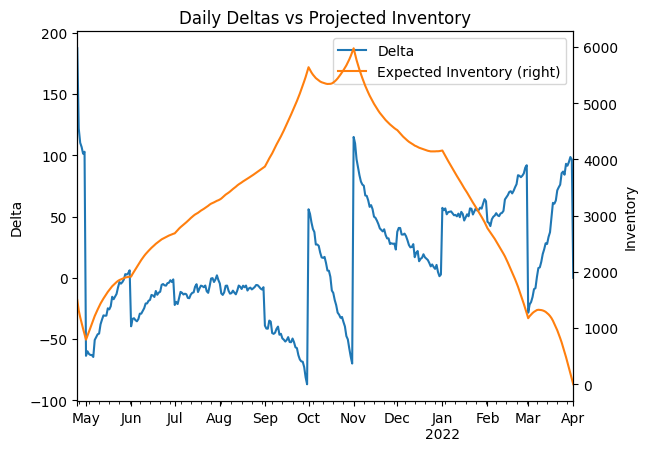

In [16]:
%matplotlib inline
ax_deltas = three_factor_results.deltas.plot(title='Daily Deltas vs Projected Inventory', legend=True, label='Delta')
ax_deltas.set_ylabel('Delta')
inventory_projection = three_factor_results.expected_profile['inventory']
ax_inventory = inventory_projection.plot(secondary_y=True, legend=True, ax=ax_deltas, label='Expected Inventory')
h1, l1 = ax_deltas.get_legend_handles_labels()
h2, l2 = ax_inventory.get_legend_handles_labels()
ax_inventory.set_ylabel('Inventory')
ax_deltas.legend(h1+h2, l1+l2, loc=1)

Plot the trigger prices.

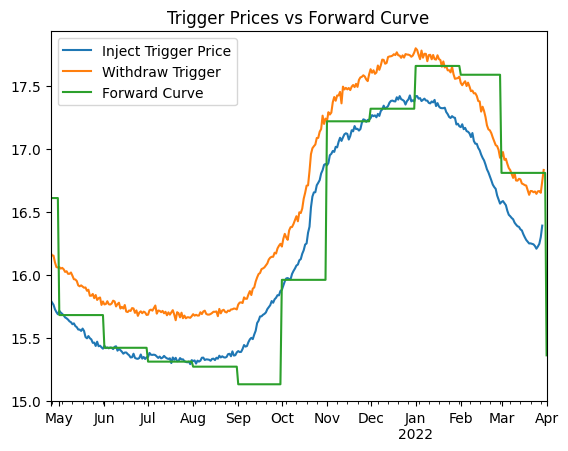

In [17]:
%matplotlib inline
ax_triggers = three_factor_results.trigger_prices['inject_trigger_price'].plot(
    title='Trigger Prices vs Forward Curve', legend=True)
three_factor_results.trigger_prices['withdraw_trigger_price'].plot(legend=True)
fwd_curve['2021-04-25' : '2022-04-01'].plot(legend=True)
ax_triggers.legend(['Inject Trigger Price', 'Withdraw Trigger', 'Forward Curve'])

### Checking Spot Simulations

In [18]:
import xlrd
from datetime import datetime

import_num_sims=1000
spot_sims_path = r'C:\test_data\spot_sims_20210715.csv'

def index_parser(date_val):
    return datetime(*xlrd.xldate_as_tuple(date_val, 0))

file_sims = pd.read_csv(spot_sims_path, skiprows=[0], names=list(range(0, import_num_sims)), date_parser=index_parser)


ModuleNotFoundError: No module named 'xlrd'

In [ ]:
import numpy as np
file_sims_mean = file_sims.aggregate(func='mean', axis='columns', raw = True)
file_sims_log_stdev = file_sims.transform(func=np.log).aggregate(func='std', axis='columns', raw = True)
%matplotlib inline
file_sims_log_stdev.plot()


In [ ]:
from cmdty_storage import multi_factor as mf
from cmdty_storage import MultiFactorModel
from datetime import timedelta
import ipywidgets as ipw
import math
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots
# Valuation parameters
freq='D'
val_date = '2021-07-15'
spot_mean_reversion = 0.24682*365.25 * 7.0 / 5.0
long_term_vol = 0.30774
seasonal_vol = 0.20092
spot_vol = 0.8427
#spot_vol = (0.8427**2 - long_term_vol**2 - seasonal_vol**2)**0.5

val_date = datetime.strptime(val_date, "%Y-%m-%d")

factors, factor_corrs = mf.create_3_factor_season_params(freq, spot_mean_reversion, spot_vol, long_term_vol, 
                                 seasonal_vol, file_sims.index[0], file_sims.index[-1])

mf_model = MultiFactorModel(freq, factors, factor_corrs)

if val_date in file_sims.index: # First point will have no vol
    stats_index = file_sims.index[1:]
else:
    stats_index = file_sims.index

model_log_stdev = pd.Series(index=stats_index, dtype='float64')
model_avg_vol = pd.Series(index=stats_index, dtype='float64')
file_sims_vol = pd.Series(index=stats_index, dtype='float64')

for cp in stats_index:
    expiry = cp #- timedelta(days=1)
    t_expiry = (expiry - val_date).days / 365.25
    model_log_stdev[cp] = mf_model.integrated_stan_dev(val_date, expiry, cp)
    model_avg_vol[cp] = mf_model.integrated_vol(val_date, expiry, cp)
    file_sims_vol[cp] = file_sims_log_stdev[cp] / math.sqrt(t_expiry)

stdev_out = ipw.Output()
avg_vol_out = ipw.Output()

with stdev_out:
    file_sims_log_stdev[1:].plot(label='Simulated', legend=True)
    model_log_stdev.plot(label='Theoretical', legend=True)
    show_inline_matplotlib_plots()
    
with avg_vol_out:
    model_avg_vol.plot(label='Model vol', legend=True)
    file_sims_vol.plot(label='Sims vol', legend=True)
    show_inline_matplotlib_plots()


    
display(ipw.HBox([stdev_out, avg_vol_out]))


In [34]:
from cmdty_storage import three_factor_seasonal_value, SimulationDataReturned

# Creating the Inputs
monthly_index = pd.period_range(start='2021-04-25', periods=25, freq='M')
monthly_fwd_prices = [16.61, 15.68, 15.42, 15.31, 15.27, 15.13, 15.96, 17.22, 17.32, 17.66, 
                      17.59, 16.81, 15.36, 14.49, 14.28, 14.25, 14.32, 14.33, 15.30, 16.58, 
                      16.64, 16.79, 16.64, 15.90, 14.63]
fwd_curve = pd.Series(data=monthly_fwd_prices, index=monthly_index).resample('D').fillna('pad')

rates = [0.005, 0.006, 0.0072, 0.0087, 0.0101, 0.0115, 0.0126]
rates_pillars = pd.PeriodIndex(freq='D', data=['2021-04-25', '2021-06-01', '2021-08-01', '2021-12-01', '2022-04-01', 
                                              '2022-12-01', '2023-12-01'])
ir_curve = pd.Series(data=rates, index=rates_pillars).resample('D').asfreq('D').interpolate(method='linear')

def settlement_rule(delivery_date):
    return delivery_date.asfreq('M').asfreq('D', 'end') + 20

storage_steps = CmdtyStorage(
    freq='D',
    storage_start = '2021-05-01',
    storage_end = '2023-04-01',
    injection_cost = 0.53,
    withdrawal_cost = 0.15,
    ratchets = [
                ('2021-04-01', # For days after 2021-04-01 (inclusive) until 2022-10-01 (exclusive):
                       [
                            (0.0, -5810.0, 7632.0),
                            (64000, -5810.1, 7632.0),
                            (64260, -15288.0, 7632.0),
                            (182070.0, -15288.0, 3816.0),
                            (192780.0, -15288.0, 2279.0),
                           (214200.0, -15288.0, 2279.0),
                        ]),
                 ],
    ratchet_interp = RatchetInterp.LINEAR
)


# Call the three-factor seasonal model
three_factor_results = three_factor_seasonal_value(
    cmdty_storage = storage_with_ratchets,
    val_date = '2021-04-25',
    inventory = 1500.0,
    fwd_curve = fwd_curve,
    interest_rates = ir_curve,
    settlement_rule = settlement_rule,
    num_sims = 10,
    seed = 12,
    spot_mean_reversion = 91.0,
    spot_vol = 0.85,
    long_term_vol =  0.30,
    seasonal_vol = 0.19,
    basis_funcs = '1 + x_st + x_sw + x_lt + s + x_st**2 + x_sw**2 + x_lt**2 + s**2 + s * x_st',
    discount_deltas = True,
    sim_data_returned=SimulationDataReturned.INVENTORY | SimulationDataReturned.CMDTY_CONSUMED | SimulationDataReturned.SPOT_ALL
)

print()
print('sim_spot_regress')
print(three_factor_results.sim_spot_regress[0:2])
print()
print('sim_spot_valuation')
print(three_factor_results.sim_spot_valuation[0:2])
print()
print('sim_factors_regress')
print(three_factor_results.sim_factors_regress[0][0:2])
print()
print('sim_factors_valuation')
print(three_factor_results.sim_factors_valuation[0][0:2])
print()
print('sim_inventory')
print(three_factor_results.sim_inventory[0:2])
print()
print('sim_inject_withdraw')
print(three_factor_results.sim_inject_withdraw[0:2])
print()
print('sim_cmdty_consumed')
print(three_factor_results.sim_cmdty_consumed[0:2])
print()
print('sim_inventory_loss')
print(three_factor_results.sim_inventory_loss[0:2])
print()
print('sim_net_volume')
print(three_factor_results.sim_net_volume[0:2])
print()
print('sim_pv')
print(three_factor_results.sim_pv[0:2])



C:\Users\Jake\AppData\Local\Temp\ipykernel_8556\1133891837.py:8: FutureWarning: PeriodIndexResampler.fillna is deprecated and will be removed in a future version. Use obj.ffill(), obj.bfill(), or obj.nearest() instead.
  fwd_curve = pd.Series(data=monthly_fwd_prices, index=monthly_index).resample('D').fillna('pad')



sim_spot_regress
                    0          1          2          3          4          5  \
2021-04-26  15.797547  17.432730  15.240166  18.070301  17.002395  16.197388   
2021-04-27  16.261421  16.915245  15.245295  18.042676  16.014191  17.176385   

                    6          7          8          9  
2021-04-26  16.670848  16.519518  16.102739  17.102332  
2021-04-27  16.628292  16.542042  15.843093  17.361882  

sim_spot_valuation
                    0          1          2          3          4          5  \
2021-04-26  17.881698  15.400908  15.993046  17.219633  16.306038  16.889105   
2021-04-27  16.973640  16.205476  16.710613  16.460552  16.967327  16.211506   

                    6          7          8          9  
2021-04-26  15.314335  17.982785  16.916837  16.279307  
2021-04-27  15.209117  18.085594  18.407700  14.942981  

sim_factors_regress
Empty DataFrame
Columns: []
Index: []

sim_factors_valuation
Empty DataFrame
Columns: []
Index: []

sim_inventory
   